## ENGLISH PREMIER LEAGUE TEAMS ANALYZED

- **Introduction - English Premier League**

 Most-watched Sports League In The World With A TV Audience Of 4.7 Billion People.<br>
 Premier Competition Of English Football League System.<br>
 20 Teams Will Play Each Other Both Home And Away, Totaling 38 Games Over 9 Months.<br>
 

- **Dataset**

    Comprises Of Stats And Results Collected Over a Period Of 4 Seasons, From 2012/13 To 2015/16 Season<br>


- **Objective**

    To Find Hidden Insights And Information About Teams,
    Performances,Playing Styles And Other Aspects. 
    

In [1]:
#Importing the Data Analysis libraries

import numpy as np
import pandas as pd

##Importing Data Visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

##Setting Local Path
my_local_path = 'C:/Users/Nithin/UpX_Academy_Material/Project Datasets/attachment_Project_2_Football_league_data/Project_2_Football league data/'

In [2]:
###Loading in the Datasets and filtering the desired columns.
s_cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A']

season12_13 = pd.read_csv('2012-13.csv',usecols=s_cols,index_col=0,parse_dates=True)
season13_14 = pd.read_csv('2013-14.csv',usecols=s_cols,index_col=0,parse_dates=True)
season14_15 = pd.read_csv('2014-15.csv',usecols=s_cols,skipfooter=1,engine='python',index_col=0,parse_dates=True)
season15_16 = pd.read_csv('2015-16.csv',usecols=s_cols,index_col=0,parse_dates=True)

In [3]:
## Checking shape and structure of the data. 
print ("Shape :",season12_13.shape,'|', season13_14.shape,'|', season14_15.shape,'|', season15_16.shape)

Shape : (380, 24) | (380, 24) | (380, 24) | (380, 24)


In [4]:
#   FTHG/AG and HTHG/AG - Full Time and Half Time Home and Away Goals, FTR/HTR- Results
#   HS/AS,HST/AST - Home/Away Shots and On Target
#   HY/AY, HF/AF, HR/AR, HC/AC - Home/Away Yellows, Fouls, Reds , Corners

In [5]:
## Checking few obeservations of 12/13 Season
season12_13.head()  

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
Date,,,,,,,,,,,,,,,,,,,,,
2012-08-18,Arsenal,Sunderland,0,0,D,0,0,D,C Foy,14,...,8,7,0,0,0,0,0,1.40,4.50,8.50
2012-08-18,Fulham,Norwich,5,0,H,2,0,H,M Oliver,11,...,11,6,3,0,0,0,0,1.80,3.60,4.50
2012-08-18,Newcastle,Tottenham,2,1,H,0,0,D,M Atkinson,6,...,8,3,5,2,2,0,0,2.50,3.40,2.75
2012-08-18,QPR,Swansea,0,5,A,0,1,A,L Probert,20,...,14,5,3,2,2,0,0,2.00,3.40,3.80
2012-08-18,Reading,Stoke,1,1,D,0,1,A,K Friend,9,...,14,4,3,2,4,0,1,2.38,3.25,3.10


In [6]:
Seasons = [season12_13,season13_14,season14_15,season15_16] ## Seasons List Object created.

In [7]:
### Function to Analyze Season's Results of a Particular Team
def Team_Season_Record(Team,Season):
        return Season[(Season.HomeTeam==Team)|(Season.AwayTeam==Team)]

In [8]:
Team_Season_Record('Tottenham',season15_16).head() ##  Returns Seasons' Results given the Team and the Season.

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-08,Man United,Tottenham,1,0,H,1,0,H,J Moss,9,...,12,1,2,2,3,0,0,1.65,4.00,6.00
2015-08-15,Tottenham,Stoke,2,2,D,2,0,H,R Madley,13,...,11,4,3,2,2,0,0,1.80,3.75,5.00
2015-08-22,Leicester,Tottenham,1,1,D,0,0,D,M Atkinson,13,...,14,2,7,1,4,0,0,2.63,3.60,2.75
2015-08-29,Tottenham,Everton,0,0,D,0,0,D,M Jones,20,...,9,6,2,4,1,0,0,2.00,3.50,4.20
2015-09-13,Sunderland,Tottenham,0,1,A,0,0,D,C Pawson,12,...,12,6,8,2,1,0,0,4.33,3.60,1.95


In [10]:
## Function to obtain the Points Table for a specific season

import collections
def PointsTable(season):
    out = pd.DataFrame()
    Teams = season.HomeTeam.unique()
    
    for i in Teams:
        y = collections.OrderedDict()
        Record = Team_Season_Record(i,season)
        Home, Away = Record[Record.HomeTeam==i] , Record[Record.AwayTeam==i]      
        y['MP'] = 38
        y['W']  = sum(Home['FTR']=='H') + sum(Away['FTR']=='A')
        y['D']  = sum(Record['FTR']=='D')
        y['L']  = sum(Home['FTR']=='A') + sum(Away['FTR']=='H')
        y['GF'] = sum(Home['FTHG']) + sum(Away['FTAG'])
        y['GA'] = sum(Home['FTAG']) + sum(Away['FTHG'])
        y['GD'] = y['GF'] - y['GA']
        y['Pts']= y['W']*3 + y['D']*1
        out = out.append(pd.DataFrame(y,index=[i]))
        
    out.sort_values(['Pts','GD'],ascending=False,inplace=True)    
    return out

PointsTable(season12_13).head()

,MP,W,D,L,GF,GA,GD,Pts
Man United,38,28,5,5,86,43,43,89
Man City,38,23,9,6,66,34,32,78
Chelsea,38,22,9,7,75,39,36,75
Arsenal,38,21,10,7,72,37,35,73
Tottenham,38,21,9,8,66,46,20,72


# SIGNIFICANCE OF HOME AND AWAY RECORDS


-   **All 4 of the Champions analyzed  finished the season with the Best Home Records.**
-   **3 out of 4 times, the Champions finished with the best Away records as well.**
-   **League Positions are a reflection of the Home and Away performances.**

In [92]:
def Records(season):
    out = pd.DataFrame()
    Teams = season.HomeTeam.unique()
    for Team in Teams:
        y = collections.OrderedDict()
        Record = Team_Season_Record(Team,season)
        Home = Record[Record.HomeTeam==Team]
        Away = Record[Record.AwayTeam==Team]
        y['Home','Win_Pct'] = (sum(Home.FTR=='H')/19)*100
        y['Home','Loss_Pct'] = (sum(Home.FTR=='A')/19)*100
        y['Home','Pts_Per_Game'] = ((sum(Home.FTR=='H')*3+sum(Home.FTR=='D'))/(19*3))*100
        y['Away','Win_Pct'] = (sum(Away.FTR=='A')/19)*100
        y['Away','Loss_Pct'] = (sum(Away.FTR=='H')/19)*100
        y['Away','Pts_Per_Game'] = ((sum(Away.FTR=='A')*3+sum(Away.FTR=='D'))/(19*3))*100
        out = out.append(pd.DataFrame(y,index=[Team]))
    out.sort_values([('Home','Pts_Per_Game')],ascending=False,inplace=True)
    return out

Records(season12_13).head()

Home                               Away             \
              Win_Pct   Loss_Pct Pts_Per_Game    Win_Pct   Loss_Pct   
Man United  84.210526  15.789474    84.210526  63.157895  10.526316   
Man City    73.684211  10.526316    78.947368  47.368421  21.052632   
Everton     63.157895   5.263158    73.684211  21.052632  31.578947   
Chelsea     63.157895  10.526316    71.929825  52.631579  26.315789   
Tottenham   57.894737  15.789474    66.666667  52.631579  26.315789   

                         
           Pts_Per_Game  
Man United    71.929825  
Man City      57.894737  
Everton       36.842105  
Chelsea       59.649123  
Tottenham     59.649123

In [90]:
plt.rcParams.update({"figure.figsize":(14,8)})

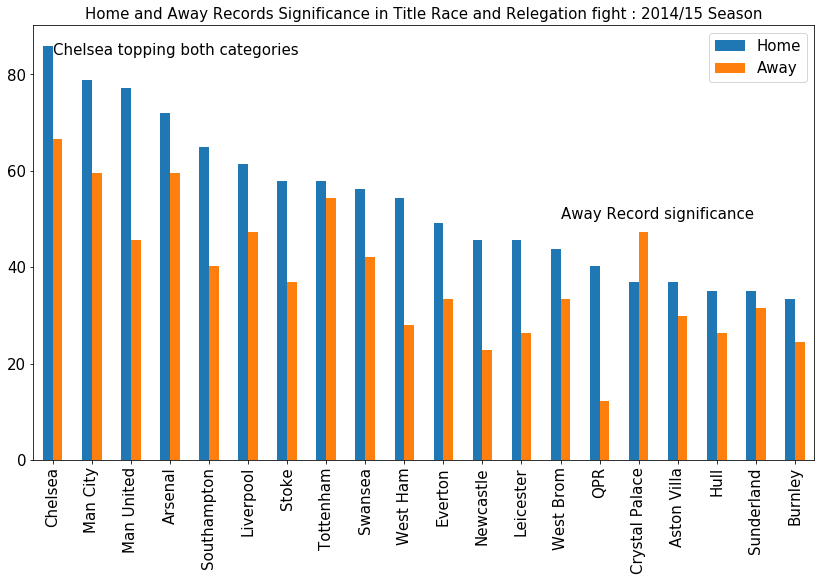

In [91]:
homeaway = Records(season14_15)[[('Home','Pts_Per_Game'),('Away','Pts_Per_Game')]]
homeaway.columns = ['Home','Away']

homeaway.plot.bar()
plt.title("Home and Away Records Significance in Title Race and Relegation fight : 2014/15 Season",size=15)
plt.annotate("Chelsea topping both categories",xy=(0,84),size=15)
plt.annotate("Away Record significance",xy=(13,50),size=15)

## Champions’ Trait - Finishing Skills the X Factor ?

** Another characteristic that the Champions had in common was their finishing skills.Their Shots on Target to Goals conversion rate was the best in the league in all but 1 season.**


** In Season 2012/13, Champions Manchester United were bettered in Shots and Shots on Target by not just 1 but 6 Teams, yet their superior finishing skills gave them the edge over the others.**

In [14]:
def shots_stats(season):
    out = pd.DataFrame()
    Teams = season.HomeTeam.unique()
    for Team in Teams:
        y = collections.OrderedDict()
        Record = Team_Season_Record(Team,season)
        
        hom1 = ['HS','HST','HC','GSH','HSC','HSCT','HAC','GCH']
        hom2 = ['HS','HST','HC','FTHG','AS','AST','AC','FTAG']  
        for i,k in list(zip(hom1,hom2)):
            y[('Home',i)] = sum(Record[Record.HomeTeam==Team][k])

        away1 = ['AS','AST','AC','GSA','ASC','ASCT','ACC','GCA']
        away2 = ['AS','AST','AC','FTAG','HS','HST','HC','FTHG']
        for m,n in list(zip(away1,away2)):
            y[('Away',m)] = sum(Record[Record.AwayTeam==Team][n])
        x = pd.DataFrame(y,index=[Team])
        out = out.append(x)            
       
    return out

shots_stats(season15_16).head()

Home                                 Away                         \
              HS HST   HC GSH  HSC HSCT  HAC GCH   AS AST   AC GSA  ASC ASCT   
Bournemouth  243  83  129  23  198   75   77  34  220  61   92  22  238   79   
Chelsea      302  93  127  32  242   94  107  30  224  80  113  27  240   85   
Everton      279  94  124  35  234   83   97  30  213  81   94  24  317  102   
Leicester    276  89   91  35  231   69  104  18  247  92  106  33  285   74   
Man United   248  75  117  27  158   41   60   9  182  68  111  22  253   82   

                      
             ACC GCA  
Bournemouth   92  33  
Chelsea       99  23  
Everton      130  25  
Leicester    135  18  
Man United    84  26

In [80]:
def ConversionRates(Season):
    df = shots_stats(Season)
    out = pd.DataFrame()                
    out['Shots_Per_Game'] = (df['Home','HS']/38+df['Away','AS']/38)*0.5 ## Average Shots Per Game
    out['Percent_ST'] = (df['Home','HST']/df['Home','HS']+df['Away','AST']/df['Away','AS'])*0.5  ## % of shots on target
    out['ST_to_Goals'] = (df['Home','GSH']/df['Home','HST']+df['Away','GSA']/df['Away','AST'])*0.5 ## % goals to shots on T.
    out.sort_values('ST_to_Goals',ascending=False,inplace=True)
    return out

ConversionRates(season12_13).head(4)   ## Reading is an exception - their finishing was good but they didn't create enough.

,Shots_Per_Game,Percent_ST,ST_to_Goals
Man United,6.736842,0.584175,0.288772
Reading,4.618421,0.511344,0.241677
Chelsea,7.486842,0.589735,0.228805
Arsenal,7.184211,0.597987,0.216172


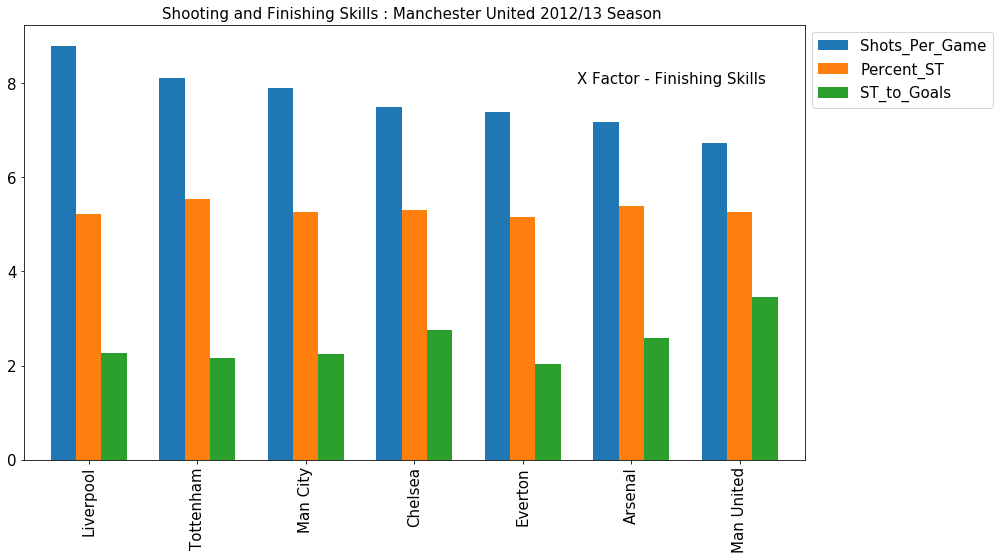

In [99]:
plt.rcParams.update({"figure.figsize":(14,8)})
ConvRt_12_13 = ConversionRates(season12_13)
ConvRt_12_13['Percent_ST'] = ConvRt_12_13['Percent_ST']*9
ConvRt_12_13['ST_to_Goals'] = ConvRt_12_13['ST_to_Goals']*12
ConvRt_12_13.sort_values('Shots_Per_Game',ascending=False,inplace=True)
ConvRt_12_13[:7].plot.bar(width=0.7)
plt.title("Shooting and Finishing Skills : Manchester United 2012/13 Season ",size=15)
plt.annotate("X Factor - Finishing Skills",xy=(4.5,8),size=15)
plt.legend(loc='best',bbox_to_anchor=(1.25,1))

## RELEGATION ANALYSIS :AWAY RECORD AND NEED FOR BALANCE

**Troubles On The Road**
- At least 2 out of 3 relegated teams every Season fell In The Bottom 3 for Away Records.
- Teams are expected to be better at Home 
- Away days are crucial At The Fag End Of The Table.
- QPR got relegated in 2014/15 despite having better Home Record than 3 of the survivors.

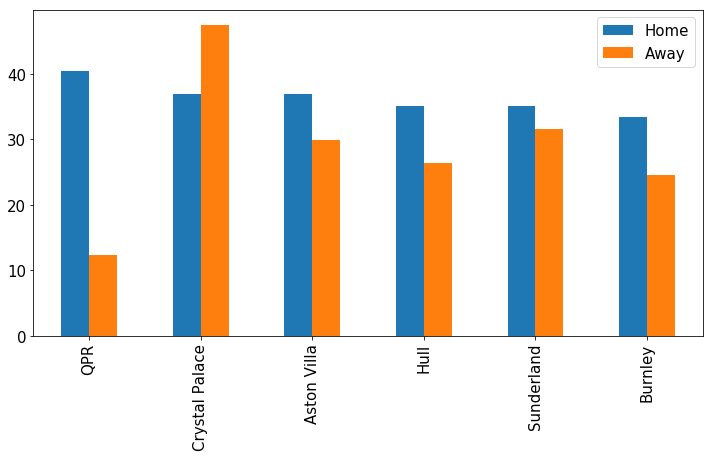

In [86]:
homeaway = Records(season14_15)[-6:][[('Home','Pts_Per_Game'),('Away','Pts_Per_Game')]] ## Filtered Last 6 teams. 
homeaway.columns = ['Home','Away']

homeaway.plot.bar()
#plt.title("Home and Away Records Significance in Title Race and Relegation fight : 2014/15 Season",size=15)
#plt.annotate("Chelsea topping both categories",xy=(0,84),size=15)
#plt.annotate("Away Record significance",xy=(13,50),size=15)

,MP,W,D,L,GF,GA,GD,Pts
Newcastle,38,10,9,19,40,63,-23,39
Sunderland,38,7,17,14,31,53,-22,38
Aston Villa,38,10,8,20,31,57,-26,38
Hull,38,8,11,19,33,51,-18,35
Burnley,38,7,12,19,28,53,-25,33
QPR,38,8,6,24,42,73,-31,30


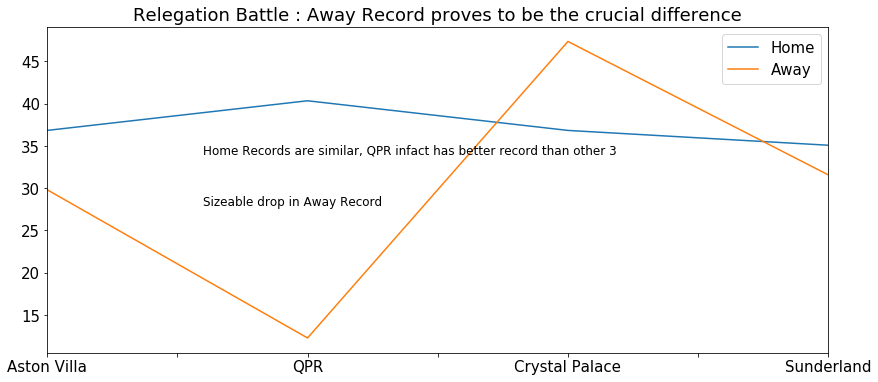

In [88]:
qpr_focus = Records(season14_15).loc[['Aston Villa','QPR','Crystal Palace','Sunderland']]
qpr_focus.xs('Pts_Per_Game',axis=1,level=1).plot(figsize=(14,6))
plt.annotate("Home Records are similar, QPR infact has better record than other 3",xy=(0.6,34),size=12)
plt.annotate("Sizeable drop in Away Record ",xy=(0.6,28),size=12)
plt.title("Relegation Battle : Away Record proves to be the crucial difference")
PointsTable(season14_15)[-6:]
#Pointsqpr_focus.xs('Pts_Per_Game',axis=1,level=1)#.plot()

## Attacks and Defences

- Worst 3 Attacks and Defences suffered relegation in all 4 seasons except one 2014/15 when Aston Villa pipped Hull City to the final survival spot thanks to their better Away record.


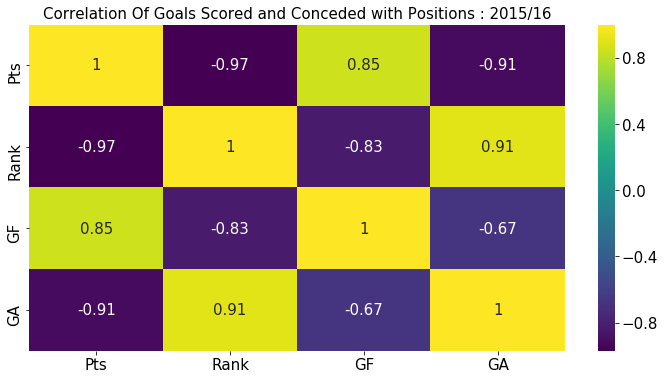

In [89]:
df = PointsTable(season15_16)
df['Rank'] = np.arange(1,len(df)+1,1)
sns.heatmap(df[['Pts','Rank','GF','GA']].corr(),annot=True,cmap='viridis') 
plt.title("Correlation Of Goals Scored and Conceded with Positions : 2015/16",size=15)

## HOME ADVANTAGE

- **Overall, Teams have been found to perform almost 50% better at Home than Away.**
- **Home crowd  and familiar surroundings plays an important role in Player Performances**

,Home Win Percentage,Away Win Percentage,Draw Percentage
Season12/13,43.684211,27.894737,28.421053
Season13_14,47.105263,32.368421,20.526316
Season14_15,45.263158,30.263158,24.473684
Season15_16,41.315789,30.526316,28.157895


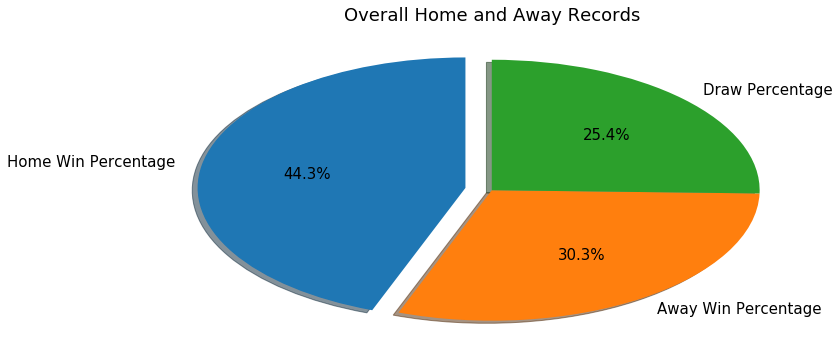

In [87]:
out = pd.DataFrame()
y = collections.OrderedDict()
lst = ['Season12/13','Season13_14','Season14_15','Season15_16']   
for i,v in zip(lst,Seasons):
    y['Home Win Percentage'] = sum(v.FTR=='H')/len(v)*100 ### Total Home Wins by Total Number Of Games
    y['Away Win Percentage'] = sum(v.FTR=='A')/len(v)*100 ## Away wins
    y['Draw Percentage'] = sum(v.FTR=='D')/len(v)*100  ## Draws
    out = out.append(pd.DataFrame(y,index=[i]))
    
fig1, ax1 = plt.subplots()
plt.title("Overall Home and Away Records")
ax1.pie(out.mean().values, explode=[0.1,0,0], labels=out.columns,\
autopct='%1.1f%%',shadow=True, startangle=90) 
out

## LEICESTER CITY : THE INCREDIBLE FAIRYTALE 

** The 2015/16 Premier League season will surely go down as the most unpredictable and extraordinary in the competition’s history, with Leicester City going from 5,000-1 outsiders to top-flight champions for the first time. **

In [45]:
def ByGameWeek(season,week=''):
    final_df = pd.DataFrame()
    for Team in season.HomeTeam.unique():
        out = pd.DataFrame()
        record = Team_Season_Record(Team,season).reset_index()
        y = collections.OrderedDict()
        
        for i in record.index:
            if record.iloc[i].HomeTeam==Team:
                if record.iloc[i].FTR=='H':
                    y['GW'+str(i+1)] = 'W'
                elif record.iloc[i].FTR=='D':
                    y['GW'+str(i+1)] = 'D'
                else:
                    y['GW'+str(i+1)] = 'L'
            else:
                if record.iloc[i].FTR=='H':
                    y['GW'+str(i+1)] = 'L'
                elif record.iloc[i].FTR=='D':
                    y['GW'+str(i+1)] = 'D'
                else:
                    y['GW'+str(i+1)] = 'W'
                    
        out = out.append(pd.DataFrame(y,index=[Team]))
        final_df = final_df.append(out)
    final_df = final_df.T
    final_df = final_df.applymap(lambda x: 3 if x=='W' else 1 if x=='D' else 0).cumsum()
    if week:
        final_df = final_df.loc[[week]].T
        final_df = final_df.rename_axis({week:'Points'},axis=1).sort_values('Points',ascending=False)
    return final_df

ByGameWeek(season12_13,'GW18').head()

,Points
Man United,43
Man City,39
Chelsea,35
Tottenham,30
Everton,30


## Turning Point in Leicester's Dream Run of Form

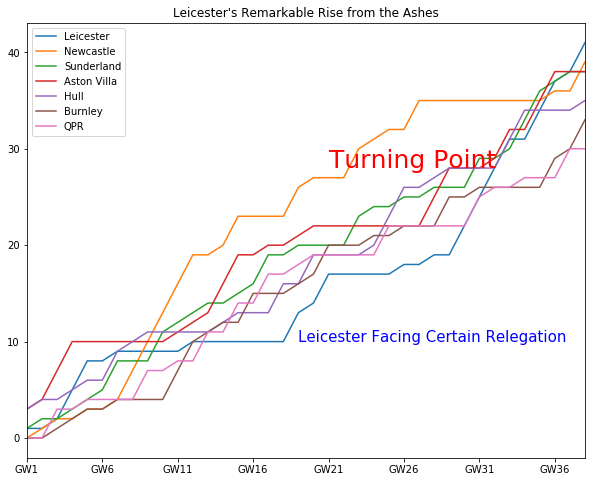

In [44]:
plt.figure(figsize=(12,8))
ByGameWeek(season14_15)[list(PointsTable(season14_15)[-7:].index)].plot(figsize=(10,8)) ### Bottom 7 Teams in 2014/15
plt.annotate('Leicester Facing Certain Relegation',xy=(18,10),color='blue',size=15)
plt.annotate("Turning Point",xy=(20,28),color='red',size=25)
plt.title("Leicester's Remarkable Rise from the Ashes")

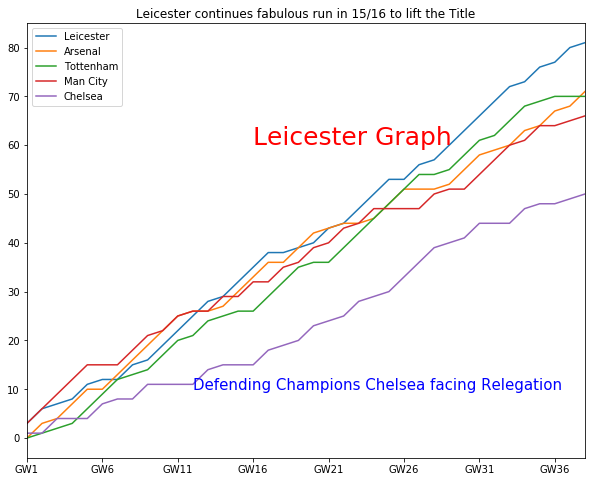

In [46]:
plt.figure(figsize=(12,8))
ByGameWeek(season15_16)[['Leicester', 'Arsenal', 'Tottenham', 'Man City', 'Chelsea']].plot(figsize=(10,8)) ## Title Race
plt.annotate('Defending Champions Chelsea facing Relegation',xy=(11,10),color='blue',size=15)
plt.annotate("Leicester Graph ",xy=(15,60),color='red',size=25)
plt.title("Leicester continues fabulous run in 15/16 to lift the Title")

# CASE FOR CONSISTENCY AND UNPREDICTABILITY

- **Manchester City've been the most consistent at the top of the table over the period of 4 seasons, leading the charts for Total Points, Goals Scored, Goal Difference, Average  Points.**


- **Leicester's remarkable fairytale got them the tag as the most Unpredictable team.**


- **Chelsea’s nosedive from champions to relegation fight saw them finishing 2nd.**


- **At the other end, while Arsenal and Spurs were consistent in their Top 4 challenges,Stoke proved a reliable midtable side and Sunderland were perennial relegation battlers.**

In [24]:
def Overall(focus):
    overall_pts = pd.DataFrame()
    for i in Seasons:
        overall_pts = overall_pts.append(PointsTable(i))
    teamwise = overall_pts.groupby(overall_pts.index)

    if focus=='consistent':
        cols = [('Total Points','sum'),('Average Pts Per Season','mean'),('Standard Deviation','std')]
        out = teamwise['Pts'].agg(cols).sort_values('Total Points',ascending=False).fillna(0)
    elif focus=='unpredictable':
        out = teamwise['Pts'].agg(['sum','mean','std']).dropna()['std'].sort_values(ascending=False)
    else:
        pass
    return out

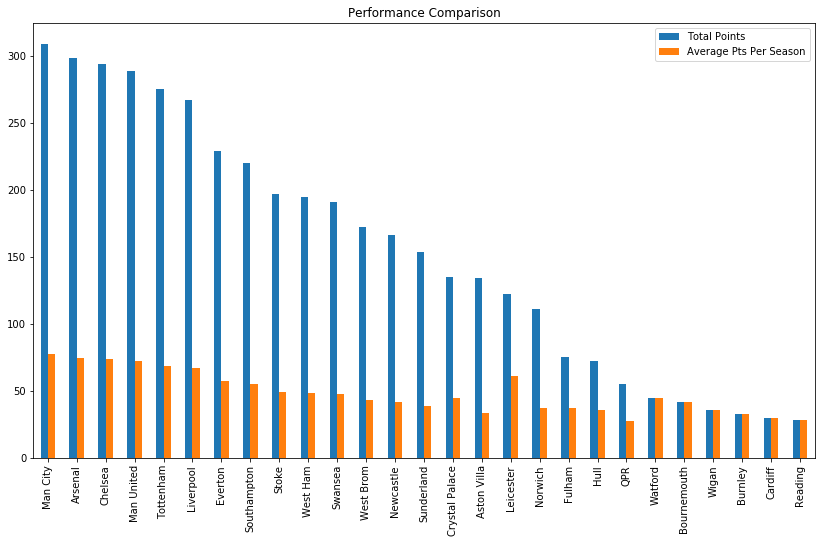

In [25]:
Overall(focus='consistent')[['Total Points','Average Pts Per Season']].plot.bar()
plt.title("Performance Comparison")

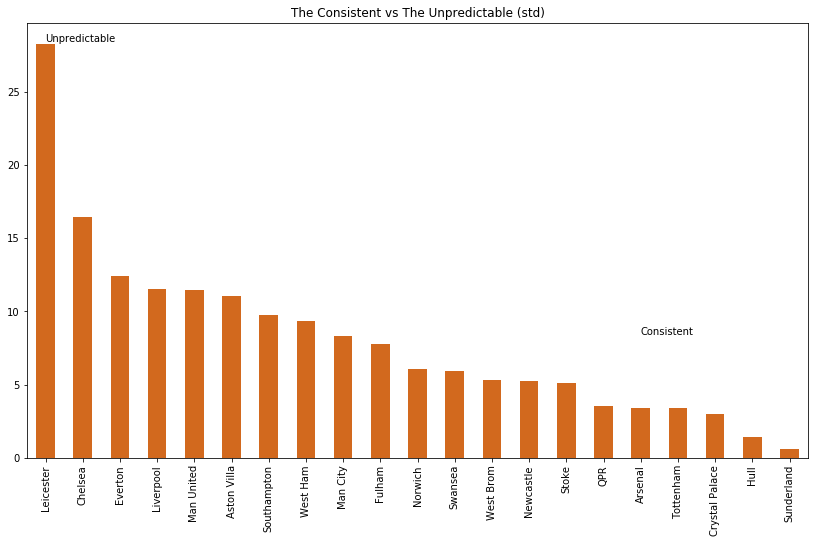

In [26]:
Overall('unpredictable').plot.bar(color='chocolate')
plt.title("The Consistent vs The Unpredictable (std)")
plt.annotate("Unpredictable",xy=(0,28.4))
plt.annotate("Consistent",xy=(16,8.4))

# BOOKIES FAVOURTIES

- Manchester City were the overwhelming favorites of the bookies over 4 seasons.
- Newly promoted sides with poor investments found the least backing from bookies.


In [27]:
def betting_stats(season):
    out = pd.DataFrame()
    Teams = season.HomeTeam.unique()
    
    for Team in Teams:
        y = collections.OrderedDict()
        Record = Team_Season_Record(Team,season)
        Home, Away  = Record[Record.HomeTeam==Team] , Record[Record.AwayTeam==Team]
        y['Home','Favour'] = Home.B365H.mean()
        y['Home','Against'] = Home.B365A.mean()
        y['Home','Draw'] = Home.B365D.mean()
        y['Away','Favour'] = Away.B365A.mean()
        y['Away','Against'] = Away.B365H.mean()
        y['Away','Draw'] = Away.B365D.mean()
        out = out.append(pd.DataFrame(y,index=[Team]))
        
    out.sort_values(by=[('Home','Favour')],inplace=True)              
    return out

betting_stats(season14_15).head()

Home                           Away                    
              Favour    Against      Draw    Favour   Against      Draw
Chelsea     1.438421  11.420000  5.742105  1.867895  5.968947  4.092632
Man City    1.448421  10.382105  5.789474  1.917895  5.214737  4.106842
Arsenal     1.605789   8.578947  4.971053  2.353158  4.114211  3.750526
Man United  1.651053   7.813684  4.815789  2.371053  4.008421  3.715789
Liverpool   1.802632   6.613684  4.457895  2.534737  3.595789  3.657895

In [28]:
plt.rcParams.update({"figure.figsize":(12,8)})

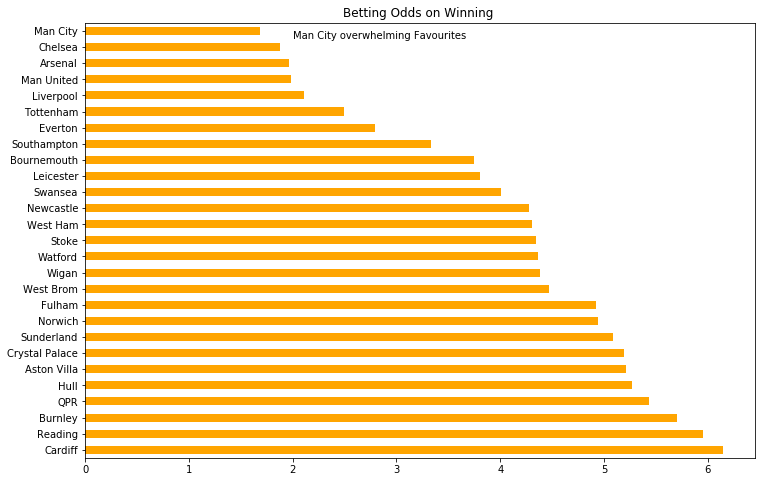

In [29]:
bet = pd.DataFrame()
for i in Seasons:
    bet = bet.append(betting_stats(i))
    
## Aggregating Bets in Favour both Home.

overall_bet = ((bet.groupby(bet.index).mean()['Home','Favour']+bet.groupby(bet.index).mean()['Away','Favour'])/2)#.sort_values()
overall_bet.sort_values(ascending=False).plot.barh(color='orange')

plt.title("Betting Odds on Winning ")
plt.annotate("Man City overwhelming Favourites",xy=(2,25.5))

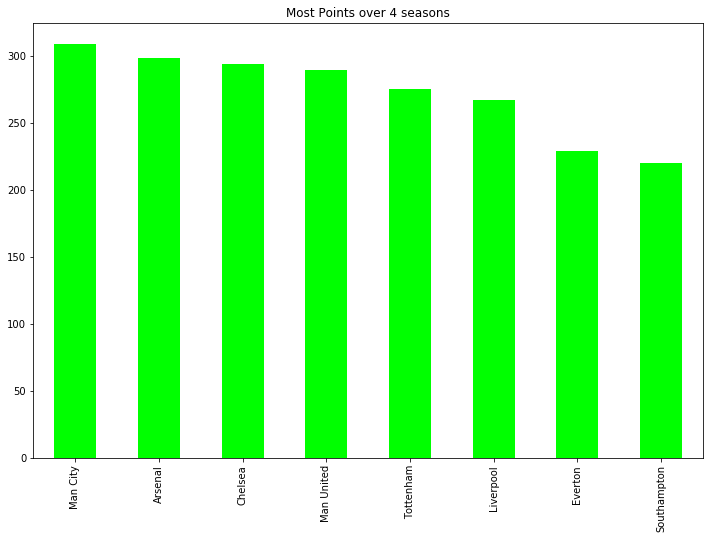

In [30]:
Overall('consistent')['Total Points'].head(8).plot.bar(color='lime')
plt.title("Most Points over 4 seasons")

# Foul Play : Fouls, Yellow Cards and Red Cards !


- Rough and Tough : 
    Stoke City, Aston Villa and Sunderland were by far the most physical and nastiest teams.
    All three topped categories for most: Fouls, Yellows and Booking Points over 4 seasons.

- Fair Play Charts 
    Arsenal topped Fair play charts with the least Fouls,Yellows and Booking Points.

- Tactical Fouls
    Southampton were the masters of Tactical fouls with the least Fouls to Yellows conversion rate.

- Smart Play
    Most of the Big Six were the smartest to avoid Reds following Yellow cards in the game.


In [31]:
def fouls_stats(season):
    out = pd.DataFrame()
    Teams = season.HomeTeam.unique()
    
    for Team in Teams:
        y = collections.OrderedDict()
        Record = Team_Season_Record(Team,season) 
        Home, Away  = Record[Record.HomeTeam==Team] , Record[Record.AwayTeam==Team]
        y['Fouls'] = sum(Home['HF']) + sum(Away['AF'])
        y['Yellow_Cards'] = sum(Home['HY']) + sum(Away['AY'])
        y['Red_Cards'] = sum(Home['HR']) + sum(Away['AR'])
        y['Foul_to_Yellow'] = (y['Yellow_Cards']/y['Fouls'])*100
        y['Yellow_to_Red'] = (y['Red_Cards']/y['Yellow_Cards'])*100
        y['Booking_Points'] = 10*y['Yellow_Cards']  + 25*y['Red_Cards']
        out = out.append(pd.DataFrame(y,index=[Team]))
        
    out.sort_values(by='Booking_Points',ascending=False,inplace=True)              
    return out

fouls_stats(season12_13).head()

,Fouls,Yellow_Cards,Red_Cards,Foul_to_Yellow,Yellow_to_Red,Booking_Points
Stoke,443,80,4,18.058691,5.000000,900
Newcastle,437,72,4,16.475973,5.555556,820
Aston Villa,428,74,3,17.289720,4.054054,815
West Ham,445,74,1,16.629213,1.351351,765
West Brom,408,62,4,15.196078,6.451613,720


In [32]:
plt.rcParams.update({"figure.figsize":(12,6)})

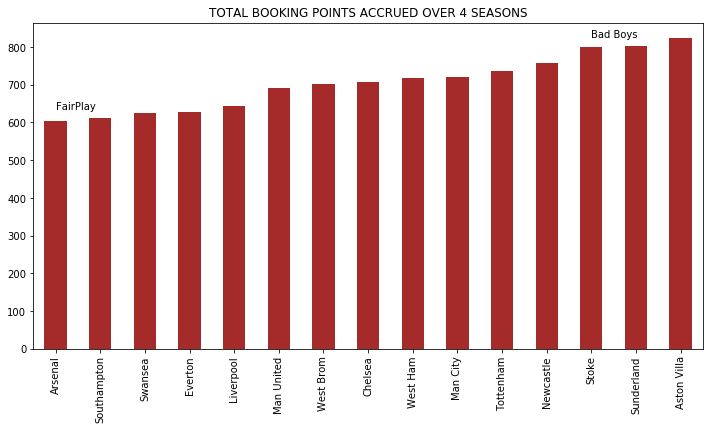

In [33]:
out = pd.DataFrame()
for i in Seasons:
    out = out.append(fouls_stats(i))
    
foul_mean = out.groupby(out.index).count() ## Mean of the Aggregate Fouls over the period.
idx = foul_mean[foul_mean.Fouls==4].index ## Filtering out Teams to play all 4 seasons.

out.groupby(out.index).mean().loc[idx].Booking_Points.sort_values().plot.bar(color='Brown') ## Booking Points plot
plt.title("TOTAL BOOKING POINTS ACCRUED OVER 4 SEASONS")
plt.annotate("Bad Boys",xy=(12,825))
plt.annotate("FairPlay",xy=(0,635))

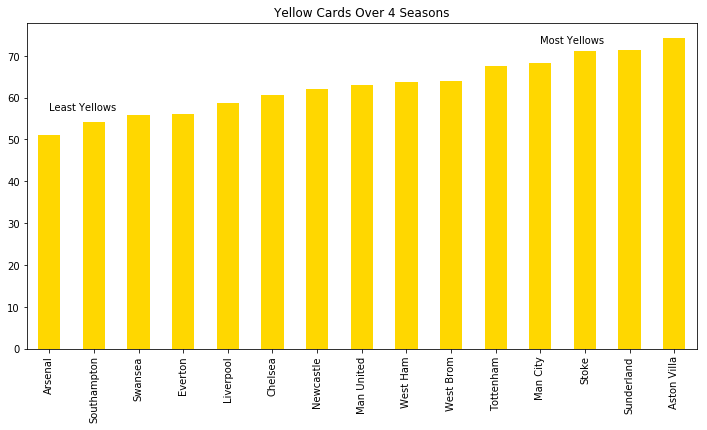

In [34]:
out.groupby(out.index).mean().loc[idx].Yellow_Cards.sort_values().plot.bar(color='gold')
plt.title("Yellow Cards Over 4 Seasons")
plt.annotate("Most Yellows",xy=(11,73))
plt.annotate("Least Yellows",xy=(0,57))

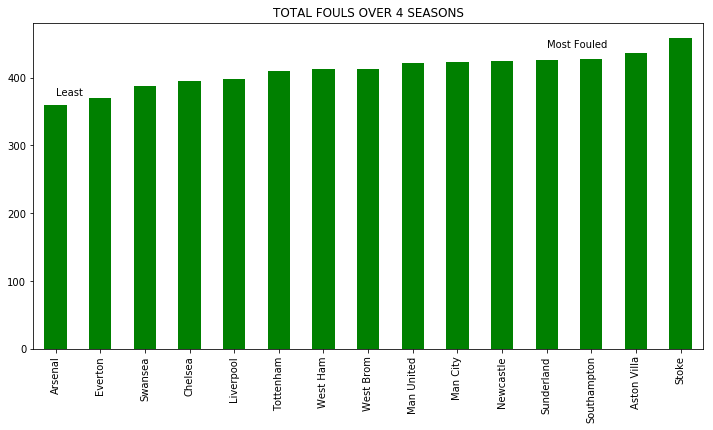

In [35]:
out.groupby(out.index).mean().loc[idx].Fouls.sort_values().plot.bar(color='Green')
plt.title("TOTAL FOULS OVER 4 SEASONS")
plt.annotate("Most Fouled",xy=(11,445))
plt.annotate("Least",xy=(0,374))

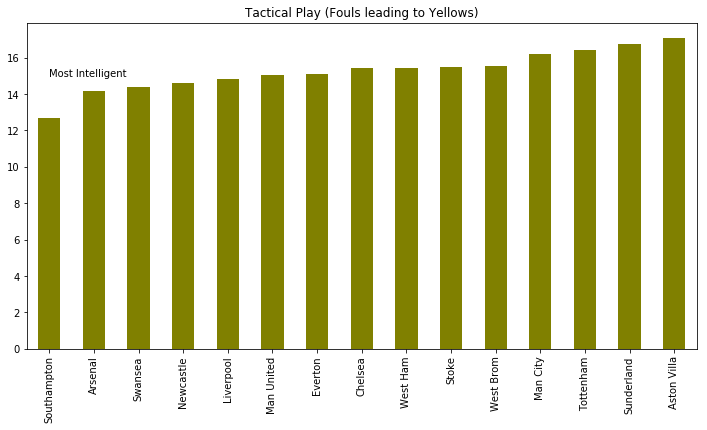

In [36]:
out.groupby(out.index).mean().loc[idx].Foul_to_Yellow.sort_values().plot.bar(color='olive')
plt.title("Tactical Play (Fouls leading to Yellows)")
plt.annotate("Most Intelligent",xy=(0,15))

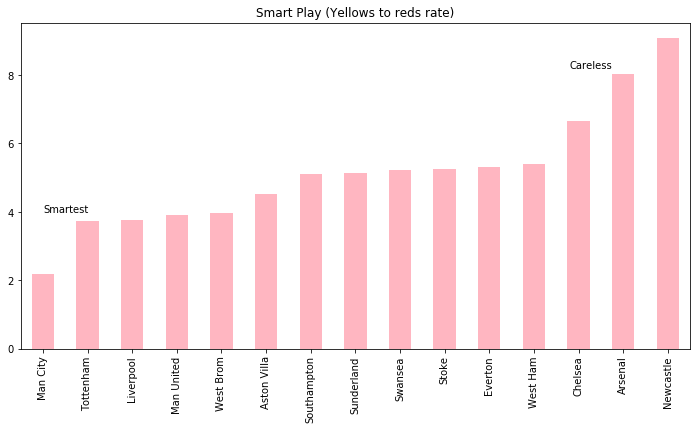

In [37]:
out.groupby(out.index).mean().loc[idx].Yellow_to_Red.sort_values().plot.bar(color='lightpink')
plt.title("Smart Play (Yellows to reds rate)")
plt.annotate("Careless",xy=(11.8,8.2))
plt.annotate("Smartest",xy=(0,4))

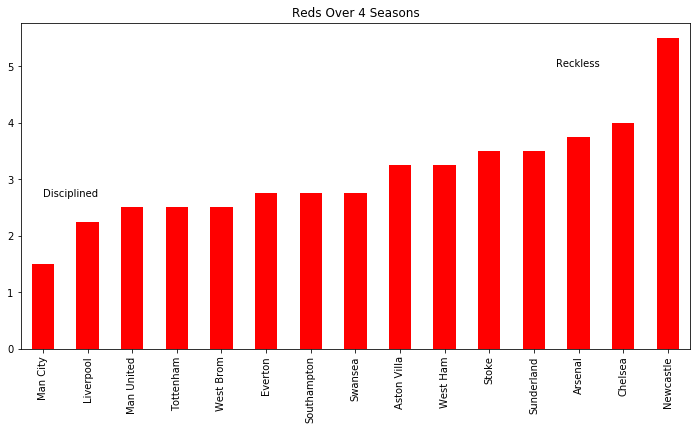

In [38]:
out.groupby(out.index).mean().loc[idx].Red_Cards.sort_values().plot.bar(color='Red')
plt.title("Reds Over 4 Seasons")
plt.annotate("Reckless",xy=(11.5,5))
plt.annotate("Disciplined",xy=(0,2.7))

# REFEREEING APPROACHES ANALYZED

- Referees were categorized based on their styles of officiating as
    Game changers: Extremely Strict
     Plays by the Rulebook : Mike Dean, Phil Dowd
     
     
- Drawing the Line : Trigger Happy 
	Lenient on hard measures – R East,C Pawson,


- Staying away from Limelight : 
	Reluctant on Reds – Kevin Friend.


- Out of the blue – No warnings/cautions
	Dealing straight in Reds : L Probert, R Madley


- Allows Flow of the Game : The Generous Kind Reluctant on blowing the whistle – Mike Halsey 


- Best Performing Referees were found to have a rate that was : High when it came to Yellows but low for Reds

In [39]:
overall_rec = pd.concat([season12_13,season13_14,season14_15,season15_16]) ## Aggregating all 4 year results
grouped = overall_rec.groupby(['Referee'])  
x = grouped.agg('mean')
ind = grouped.size()[grouped.size()>15].index ## Referees with more than 15 matches only are considered.
x = x[['HF', 'AF', 'HY', 'AY', 'HR', 'AR']].loc[ind] ## Focusing on disciplinary columns only.
ref = pd.DataFrame()        
ref['Total_Fouls'] = x['HF'] + x['AF']
ref['Total_Yellows'] = x['HY'] + x['AY']
ref['Total_Reds'] = x['HR'] + x['AR']    
ref['Foul_to_Yellow'] = (ref['Total_Yellows']/ref['Total_Fouls'])*100  ## Ratio of Fouls to Yellows
ref['Yellow_to_Red'] = (ref['Total_Reds']/ref['Total_Yellows'])*100 ## Ratio of Yellows to Reds
ref.sort_values('Total_Yellows',ascending=False,inplace=True)
ref.head(3)

,Total_Fouls,Total_Yellows,Total_Reds,Foul_to_Yellow,Yellow_to_Red
Referee,,,,,
P Dowd,22.597222,3.930556,0.208333,17.393977,5.300353
M Dean,22.333333,3.641026,0.205128,16.303100,5.633803
K Friend,22.364706,3.611765,0.094118,16.149395,2.605863


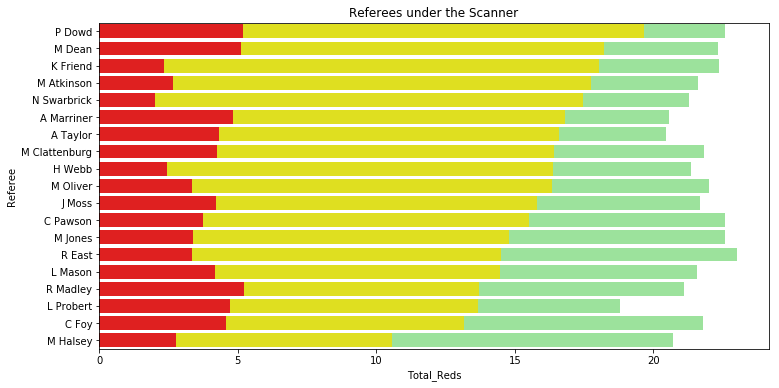

In [40]:
sns.barplot(y=ref.index,x=ref.Total_Fouls,data=ref,color='lightgreen',)
sns.barplot(y=ref.index,x=ref.Total_Yellows*5,data=ref,color='yellow')
sns.barplot(y=ref.index,x=ref.Total_Reds*25,data=ref,color='red')
plt.title("Referees under the Scanner")

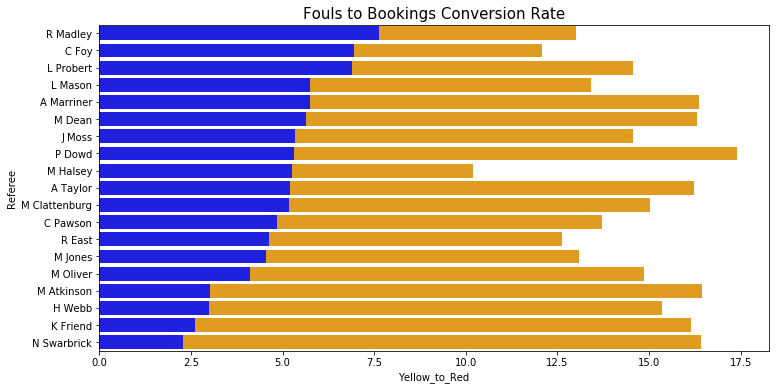

In [41]:
conv = ref.sort_values('Yellow_to_Red',ascending=False)
sns.barplot(x='Foul_to_Yellow',y=conv.index,data=conv,color='orange')
sns.barplot(x='Yellow_to_Red',y=conv.index,data=conv,color='blue')
plt.title('Fouls to Bookings Conversion Rate',size=15)

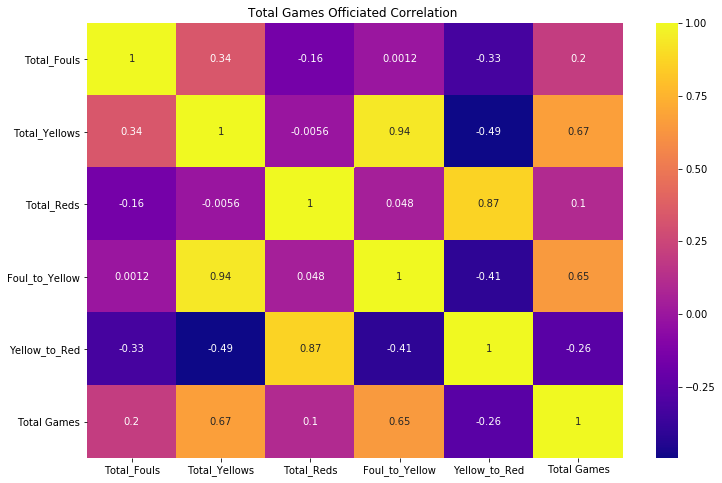

In [42]:
count = overall_rec.groupby('Referee').count()['HomeTeam']
ct_df = pd.DataFrame(data=count.values,index=count.index,columns=['Total Games'])
ref_perf = pd.concat([ref,ct_df],axis=1).dropna()


plt.figure(figsize=(12,8))
sns.heatmap(ref_perf.corr(),annot=True,cmap='plasma')
plt.title("Total Games Officiated Correlation ")